In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=ff8017d1de1c03922075d6d9cc75ec2d55fc2c0b74aad0477d56eea5262fe87f
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.metrics import f1_score, normalized_mutual_info_score
from itertools import permutations

# Ids2 Dataset

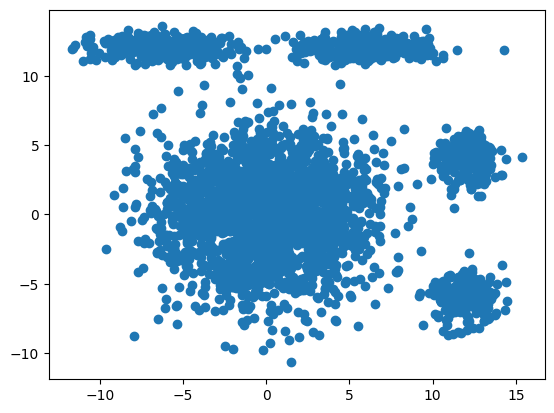

In [ ]:

mat = scipy.io.loadmat("/content/drive/My Drive/datasets/ids2.mat")

con_list = [[element for element in upperElement] for upperElement in mat['data']]

labels = mat['label']
labels = np.array(labels.flatten())

columns = ['data_x', 'data_y']
df = pd.DataFrame(con_list, columns=columns)
plt.scatter(x=df['data_x'], y=df['data_y'])

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df)
X = sc.transform(df)
type(X)

numpy.ndarray

In [ ]:
# Set the SOM parameters (you can adjust these values)
som_shape = (30, 30)  # Grid size of the SOM


som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1])
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000000)

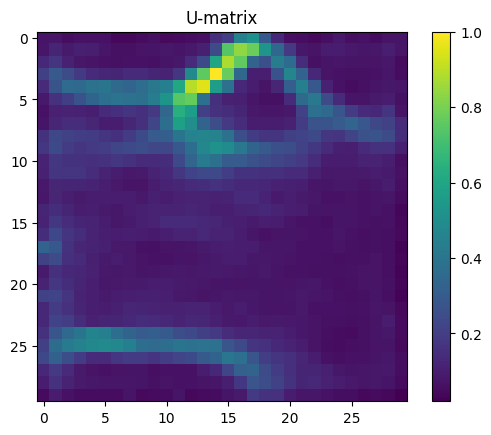

In [ ]:
u_matrix = som.distance_map()

plt.imshow(u_matrix)
plt.title('U-matrix')
plt.colorbar()
plt.show()

In [ ]:
som_shape = (1,5)  # Grid size of the SOM
learning_rate = [0.01,0.1,0.3,0.5,0.7,0.9]  # Initial learning rate
sigma = [1,3,5,10]  # Initial neighborhood radius
dict={}
max_nmi=0
lr=0
sig=0
for l in learning_rate:
  for s in sigma:
     som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=s, learning_rate=l)
     som.random_weights_init(X)
     som.train_random(data=X, num_iteration=1000)
     u_matrix = som.distance_map()

     predicted_labels = np.array([som.winner(x) for x in X])
     i=0
     for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = i
            i += 1

     pred = []
     for x, y in predicted_labels:
        pred.append(dict[(x, y)])

     nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())
     if nmi>max_nmi:
      max_nmi = nmi
      lr=l
      sig=s
print(f"lr={lr}, sigma={sig} => Normalized Mutual Information (NMI): {max_nmi}")

lr=0.7, sigma=1 => Normalized Mutual Information (NMI): 0.8406654057790216


In [ ]:
# Set the SOM parameters (you can adjust these values)
som_shape = (1, 5)  # Grid size of the SOM
learning_rate = 0.7  # Initial learning rate
sigma = 1.0  # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

u_matrix = som.distance_map()
c = 0
dict = {}

permut = list(permutations(range(labels.min(), som_shape[0] * som_shape[1] + labels.min())))

max_f1 = 0
best_label = None
for p in permut:

    i = 0
    for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = p[i]
            i += 1

    predicted_labels = np.array([som.winner(x) for x in X])
    pred = []
    for x, y in predicted_labels:
        pred.append(dict[(x, y)])

    f1 = f1_score(labels.flatten(), np.array(pred).flatten(), average='macro')

    if f1 > max_f1:
        max_f1 = f1

nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())

print(f"F1-Sore: {max_f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

F1-Sore: 0.8650104615477623
Normalized Mutual Information (NMI): 0.7697875189865503


# USPS Dataset

In [ ]:

mat = scipy.io.loadmat("/content/drive/My Drive/datasets/USPS.mat")

con_list = [[element for element in upperElement] for upperElement in mat['X']]

labels = mat['Y']
labels = np.array(labels.flatten())

df = pd.DataFrame(con_list)

sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df)
X = sc.transform(df)
type(X)

df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.000000,-1.000000,-1.000000,-0.999997,-0.999729,-0.989537,-0.860165,-0.395924,0.048299,-0.282151,...,0.131298,0.384728,0.433073,0.193397,-0.237439,-0.649848,-0.906359,-0.988672,-0.999475,-0.999994
1,-0.999927,-0.993644,-0.900309,-0.632621,-0.443145,-0.454436,-0.474872,-0.431176,-0.494539,-0.583648,...,-0.388084,-0.273639,0.001094,0.294825,0.316915,0.113494,-0.092331,-0.329390,-0.584681,-0.868793
2,-1.000000,-1.000000,-1.000000,-0.999995,-0.999986,-0.999987,-0.999990,-0.999316,-0.976299,-0.725917,...,-0.999778,-0.988816,-0.821857,-0.277379,0.136501,-0.247816,-0.809498,-0.988116,-0.999864,-1.000000
3,-0.999998,-0.999800,-0.994136,-0.932288,-0.673685,-0.192056,0.218820,0.337224,0.193371,-0.065072,...,-0.373861,0.196530,0.002823,-0.695900,-0.976372,-0.999458,-0.999996,-1.000000,-1.000000,-1.000000
4,-1.000000,-0.999971,-0.997452,-0.957499,-0.801681,-0.510623,-0.107965,0.217262,0.216431,-0.008529,...,0.214362,0.339240,0.458489,0.473456,0.372240,0.173322,-0.144182,-0.542254,-0.863031,-0.981978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293,-1.000000,-0.999994,-0.999321,-0.980459,-0.794210,-0.254973,0.280592,0.447993,0.219635,-0.381608,...,0.440799,0.424252,0.273223,0.045554,-0.271012,-0.624501,-0.891083,-0.986282,-0.999364,-0.999993
9294,-1.000000,-0.999999,-0.999929,-0.997031,-0.958108,-0.788782,-0.422594,0.050120,0.359004,0.317717,...,-0.723952,-0.045200,0.243265,-0.211727,-0.797285,-0.987273,-0.999854,-1.000000,-1.000000,-1.000000
9295,-0.999985,-0.998547,-0.966704,-0.723508,-0.155824,0.073144,-0.394682,-0.861495,-0.990816,-0.997802,...,0.313235,0.253947,-0.374854,-0.863926,-0.991874,-0.999908,-1.000000,-1.000000,-1.000000,-1.000000
9296,-0.999889,-0.996943,-0.962894,-0.772274,-0.303180,0.199492,0.377436,0.159035,-0.186853,-0.523479,...,0.422100,0.266813,0.097945,-0.142201,-0.559187,-0.867977,-0.978216,-0.998277,-0.999924,-0.999998


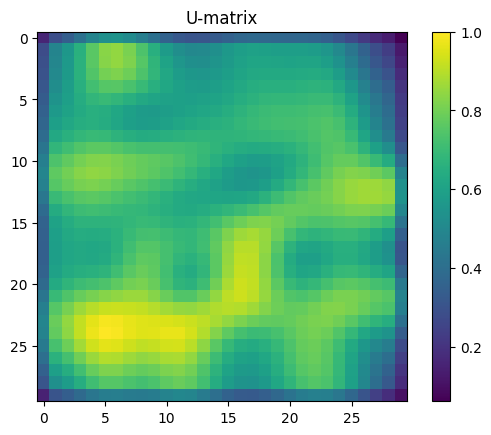

In [ ]:
# Set the SOM parameters (you can adjust these values)
som_shape = (30,30)  # Grid size of the SOM
learning_rate = 0.3  # Initial learning rate
sigma = 10 # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=10000)

u_matrix = som.distance_map()

plt.imshow(u_matrix, cmap='viridis')
plt.title('U-matrix')
plt.colorbar()
plt.show()

In [ ]:
som_shape = (2,5)  # Grid size of the SOM
learning_rate = [0.01,0.1,0.3,0.5,0.7,0.9]  # Initial learning rate
sigma = [1,3,5,10]  # Initial neighborhood radius
dict={}
max_nmi=0
lr=0
sig=0
for l in learning_rate:
  for s in sigma:
     som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=s, learning_rate=l)
     som.random_weights_init(X)
     som.train_random(data=X, num_iteration=1000)
     u_matrix = som.distance_map()

     predicted_labels = np.array([som.winner(x) for x in X])
     i=0
     for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = i
            i += 1

     pred = []
     for x, y in predicted_labels:
        pred.append(dict[(x, y)])

     nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())
     if nmi>max_nmi:
      max_nmi = nmi
      lr=l
      sig=s
print(f"lr={lr}, sigma={sig} => Normalized Mutual Information (NMI): {max_nmi}")

lr=0.7, sigma=1 => Normalized Mutual Information (NMI): 0.5742803478115412


In [ ]:
from multiprocessing import Pool
import random

def calculate_f1_for_cluster(p0,p1,p2,p3,p4,p5,p6,p7,p8,p9):
    i = 0
    p = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]
    for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = p[i]
            i += 1

    pred = []
    for x, y in predicted_labels:
        pred.append(dict[(x, y)])
    f1 = f1_score(labels.flatten(), np.array(pred).flatten(), average='macro')
    return f1

def parallel_f1_calculation(args):
    return calculate_f1_for_cluster(*args)




# Set the SOM parameters (you can adjust these values)
som_shape = (2,5)  # Grid size of the SOM
learning_rate = 0.7  # Initial learning rate
sigma = 1  # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

predicted_labels = np.array([som.winner(x) for x in X])

u_matrix = som.distance_map()
c = 0

permut = list(permutations(range(labels.min(), som_shape[0] * som_shape[1] + labels.min())))

max_f1 = []
best_label = None

pool = Pool()

f1_scores = pool.map(parallel_f1_calculation, permut)

pool.close()
pool.join()

print(f"F1-Sore: {max(f1_scores)}")
print(f"Normalized Mutual Information (NMI): {max_nmi}")

F1-Sore: 0.3992170156055018
Normalized Mutual Information (NMI): 0.5742803478115412


# GLI_85 Dataset

In [16]:

mat = scipy.io.loadmat("/content/drive/My Drive/datasets/GLI_85.mat")

con_list = [[element for element in upperElement] for upperElement in mat['X']]

labels = mat['Y']
labels = np.array(labels.flatten())

df = pd.DataFrame(con_list)

sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df)
X = sc.transform(df)

df

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
0,29844.273,1011.659,689.391,5198.424,269.881,2033.805,986.082,149.570,44.134,527.588,...,59.201,404.532,67839.320,53978.508,52.274,28.044,35.416,4.863,26.816,22.039
1,17265.617,793.230,584.338,4367.415,538.245,1342.165,1087.825,117.612,42.127,421.173,...,167.934,427.738,97757.890,80901.240,30.942,42.106,103.130,19.493,91.644,27.866
2,25947.941,880.637,862.301,4867.595,294.926,1036.071,979.293,93.095,28.982,494.550,...,483.403,496.755,84907.320,61828.957,77.635,33.896,16.005,4.074,37.106,9.872
3,29054.473,1000.799,842.576,6974.653,428.498,1890.961,1055.917,80.668,71.308,1010.702,...,171.377,617.696,114561.350,99823.070,79.836,58.045,54.872,11.043,48.565,30.257
4,30286.408,687.285,798.224,8020.007,404.549,2420.757,1398.942,248.498,67.267,945.524,...,210.828,1033.011,134436.270,106568.930,41.904,78.221,144.647,15.498,158.274,34.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,56412.902,958.140,925.398,6217.968,706.057,2690.211,1202.884,88.991,30.365,375.230,...,117.219,445.990,104814.040,87453.914,38.144,44.336,333.143,20.128,13.685,25.177
81,23499.720,1756.370,1503.472,4950.528,293.752,1994.186,603.244,806.646,32.505,303.930,...,419.160,309.004,93213.980,83785.330,52.262,101.487,182.022,115.752,28.386,28.865
82,27075.715,237.787,414.418,6071.487,670.498,1723.033,460.246,62.021,100.764,286.953,...,248.617,28.501,115814.640,115779.360,66.722,65.477,243.287,178.151,25.199,24.611
83,25782.137,851.590,1345.876,5301.146,234.302,2443.622,887.260,620.340,347.230,154.523,...,37.085,385.131,90180.234,77167.280,139.227,38.703,33.165,20.294,25.502,21.344


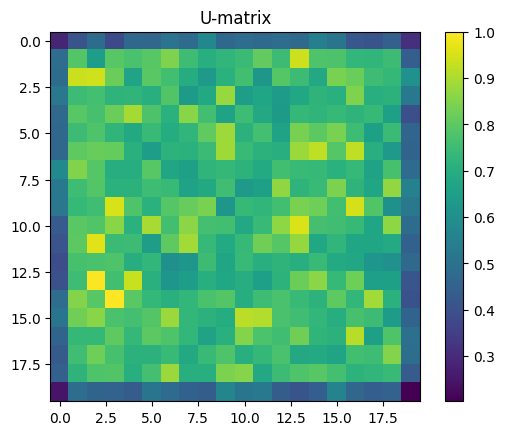

In [19]:
# Set the SOM parameters (you can adjust these values)
som_shape = (20, 20)  # Grid size of the SOM
learning_rate = 0.3  # Initial learning rate
sigma = 0.5 # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

u_matrix = som.distance_map()

plt.imshow(u_matrix, cmap='viridis')
plt.title('U-matrix')
plt.colorbar()
plt.show()

In [20]:
som_shapes = [(1,2),(1,3),(1,4),(1,5)]  # Grid size of the SOM
learning_rate = [0.01,0.1,0.3,0.5,0.7,0.9]  # Initial learning rate
sigma = [1,3,5,10]  # Initial neighborhood radius
dict={}
max_nmi=0
lr=0
sig=0
shape=0
for som_shape in som_shapes:
 for l in learning_rate:
  for s in sigma:
     som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=s, learning_rate=l)
     som.random_weights_init(X)
     som.train_random(data=X, num_iteration=1000)
     u_matrix = som.distance_map()

     predicted_labels = np.array([som.winner(x) for x in X])
     i=0
     for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = i
            i += 1

     pred = []
     for x, y in predicted_labels:
        pred.append(dict[(x, y)])

     nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())
     if nmi>max_nmi:
      max_nmi = nmi
      lr=l
      sig=s
      shape = som_shape
print(f"shape ={shape}, lr={lr}, sigma={sig} => Normalized Mutual Information (NMI): {max_nmi}")

shape =(1, 3), lr=0.7, sigma=10 => Normalized Mutual Information (NMI): 0.3304478018679809


In [24]:
# Set the SOM parameters (you can adjust these values)
som_shape = shape # Grid size of the SOM
learning_rate = lr  # Initial learning rate
sigma = sig  # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

predicted_labels = np.array([som.winner(x) for x in X])

u_matrix = som.distance_map()
c = 0
dict = {}

permut = list(permutations(range(labels.min(), som_shape[0] * som_shape[1] + labels.min())))

max_f1 = 0
best_label = None
for p in permut:

    i = 0
    for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = p[i]
            i += 1


    pred = []
    for x, y in predicted_labels:
        pred.append(dict[(x, y)])

    f1 = f1_score(labels.flatten(), np.array(pred).flatten(), average='macro')

    if f1 > max_f1:
        max_f1 = f1

nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())

print(f"F1-Sore: {max_f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

F1-Sore: 0.8018648018648018
Normalized Mutual Information (NMI): 0.379480591813931


# nci9 Dataset

In [25]:

mat = scipy.io.loadmat("/content/drive/My Drive/datasets/nci9.mat")

con_list = [[element for element in upperElement] for upperElement in mat['X']]

labels = mat['Y']
labels = np.array(labels.flatten())

df = pd.DataFrame(con_list)

sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df)
X = sc.transform(df)

df

,0,1,2,3,4,5,6,7,8,9,...,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,-2,0,0,0,0,0
1,0,-2,-2,0,0,-2,0,0,-2,0,...,-2,0,0,-2,-2,-2,0,0,-2,-2
2,-2,2,-2,0,-2,0,-2,-2,0,0,...,-2,-2,-2,-2,0,0,0,-2,-2,0
3,2,0,2,0,0,2,0,2,2,2,...,0,2,2,0,0,0,2,0,2,0
4,0,0,2,0,0,2,0,2,2,2,...,0,0,2,0,0,2,0,0,0,0
5,-2,-2,-2,0,-2,-2,-2,2,-2,-2,...,2,2,2,2,2,0,-2,2,2,0
6,0,0,0,0,0,2,2,2,2,0,...,-2,0,-2,2,0,2,2,2,0,-2
7,0,0,-2,0,-2,0,-2,-2,0,0,...,0,0,-2,0,0,2,0,-2,-2,0
8,0,2,0,0,0,0,0,2,0,0,...,-2,2,-2,0,2,0,0,-2,0,0
9,-2,0,0,0,-2,-2,-2,-2,-2,-2,...,-2,0,2,-2,0,0,-2,-2,-2,0


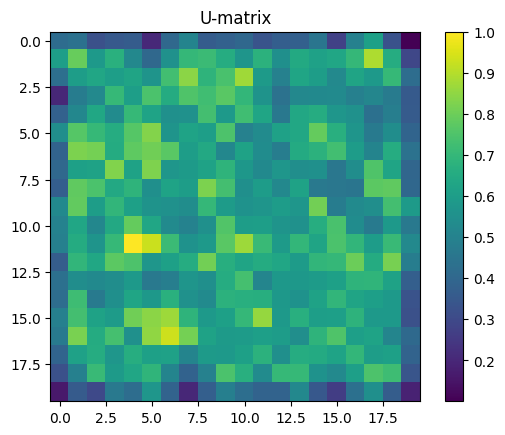

In [27]:
# Set the SOM parameters (you can adjust these values)
som_shape = (20, 20)  # Grid size of the SOM
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1])
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

u_matrix = som.distance_map()

plt.imshow(u_matrix, cmap='viridis')
plt.title('U-matrix')
plt.colorbar()
plt.show()

In [28]:
som_shapes = [(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)]  # Grid size of the SOM
learning_rate = [0.01,0.1,0.3,0.5,0.7,0.9]  # Initial learning rate
sigma = [1,3,5,10]  # Initial neighborhood radius
dict={}
max_nmi=0
lr=0
sig=0
shape=0
for som_shape in som_shapes:
 for l in learning_rate:
  for s in sigma:
     som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=s, learning_rate=l)
     som.random_weights_init(X)
     som.train_random(data=X, num_iteration=1000)
     u_matrix = som.distance_map()

     predicted_labels = np.array([som.winner(x) for x in X])
     i=0
     for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = i
            i += 1

     pred = []
     for x, y in predicted_labels:
        pred.append(dict[(x, y)])

     nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())
     if nmi>max_nmi:
      max_nmi = nmi
      lr=l
      sig=s
      shape = som_shape
print(f"shape ={shape}, lr={lr}, sigma={sig} => Normalized Mutual Information (NMI): {max_nmi}")

shape =(1, 10), lr=0.1, sigma=1 => Normalized Mutual Information (NMI): 0.4883870359560601


In [32]:
from multiprocessing import Pool
import random

def calculate_f1_for_cluster(p0,p1,p2,p3,p4,p5,p6,p7,p8,p9):
    i = 0
    p = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]
    for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = p[i]
            i += 1

    pred = []
    for x, y in predicted_labels:
        pred.append(dict[(x, y)])
    f1 = f1_score(labels.flatten(), np.array(pred).flatten(), average='macro')
    return f1

def parallel_f1_calculation(args):
    return calculate_f1_for_cluster(*args)


# Set the SOM parameters (you can adjust these values)
som_shape = shape  # Grid size of the SOM
learning_rate = lr  # Initial learning rate
sigma = sig  # Initial neighborhood radius


som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

predicted_labels = np.array([som.winner(x) for x in X])

u_matrix = som.distance_map()
c = 0

permut = list(permutations(range(labels.min(), som_shape[0] * som_shape[1] + labels.min())))

max_f1 = []
best_label = None

pool = Pool()

f1_scores = pool.map(parallel_f1_calculation, permut)

pool.close()
pool.join()

print(f"F1-Sore: {max(f1_scores)}")
print(f"Normalized Mutual Information (NMI): {max_nmi}")

F1-Sore: 0.3211033411033411
Normalized Mutual Information (NMI): 0.4883870359560601


# Lung Dataset

In [4]:

mat = scipy.io.loadmat("datasets/lung.mat")

con_list = [[element for element in upperElement] for upperElement in mat['X']]

labels = mat['Y']
labels = np.array(labels.flatten())

df = pd.DataFrame(con_list)

sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df)
X = sc.transform(df)

df

,0,1,2,3,4,5,6,7,8,9,...,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311
0,3.865257,1.796990,1.643650,2.307902,3.411704,3.410870,3.527868,3.488609,3.600405,3.652136,...,2.183981,2.519171,1.000000,2.174641,2.902840,1.844850,2.647755,1.000000,2.219480,1.992730
1,3.763867,2.281193,2.199179,2.579235,3.382473,3.375192,3.514874,3.597044,3.663170,3.617475,...,2.295435,1.488551,1.000000,2.021685,3.244604,2.413166,2.418467,1.473341,3.005292,2.232793
2,3.906659,1.558888,1.723497,2.254814,3.205421,3.272266,3.473874,3.455869,3.625198,3.682693,...,2.036709,1.581893,1.000000,2.089145,3.131221,2.218641,2.441954,1.722881,2.635061,1.805569
3,3.809383,1.912355,1.856940,2.498944,3.289406,3.371232,3.541995,3.358976,3.473179,3.628930,...,1.869965,1.481658,1.000000,2.155032,3.270371,1.928473,2.618074,2.154013,2.530046,2.185514
4,3.861195,2.333064,2.299202,2.626987,3.400348,3.366804,3.525154,3.597381,3.686170,3.677235,...,1.617420,1.768268,1.081707,2.042339,3.166306,2.073095,2.505313,2.013553,2.916849,2.080482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,3.941319,1.842734,1.895423,2.077077,3.436320,3.442991,3.532000,3.446922,3.507434,3.459082,...,2.153174,2.055799,1.758761,2.211388,2.924848,1.867526,2.710769,2.020071,2.088809,2.479374
199,3.907102,1.000000,1.473633,2.158604,3.459391,3.478222,3.621380,3.480155,3.595473,3.627081,...,2.232310,1.380573,1.000000,2.105578,2.902655,2.156428,2.272538,1.000000,1.968483,2.318502
200,3.878837,1.488974,1.747878,2.312156,3.331662,3.371447,3.547927,3.265942,3.381427,3.465231,...,2.104043,1.944680,1.000000,2.242541,2.590407,1.798651,2.685760,1.000000,1.838597,2.140979
201,3.918281,1.719994,1.986682,2.216667,3.377543,3.346625,3.577061,3.392839,3.486097,3.486612,...,2.063258,2.338875,1.551206,1.898561,3.309511,2.021148,2.813861,2.239550,2.204744,2.252732


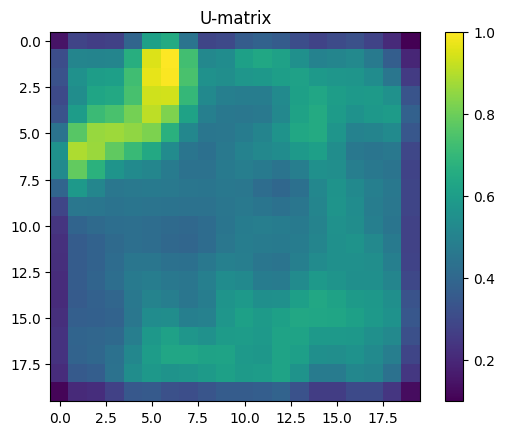

In [11]:
som_shape = (20,20)  # Grid size of the SOM
learning_rate = 0.5  # Initial learning rate
sigma = 5 # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

u_matrix = som.distance_map()

plt.imshow(u_matrix, cmap='viridis')
plt.title('U-matrix')
plt.colorbar()
plt.show()


In [6]:
som_shapes = [(1,2),(1,3),(1,4),(1,5)]  # Grid size of the SOM
learning_rate = [0.01,0.1,0.3,0.5,0.7,0.9]  # Initial learning rate
sigma = [1,3,5,10]  # Initial neighborhood radius
dict={}
max_nmi=0
lr=0
sig=0
shape=0
for som_shape in som_shapes:
 for l in learning_rate:
  for s in sigma:
     som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=s, learning_rate=l)
     som.random_weights_init(X)
     som.train_random(data=X, num_iteration=1000)
     u_matrix = som.distance_map()

     predicted_labels = np.array([som.winner(x) for x in X])
     i=0
     for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = i
            i += 1

     pred = []
     for x, y in predicted_labels:
        pred.append(dict[(x, y)])

     nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())
     if nmi>max_nmi:
      max_nmi = nmi
      lr=l
      sig=s
      shape = som_shape
print(f"shape ={shape}, lr={lr}, sigma={sig} => Normalized Mutual Information (NMI): {max_nmi}")

shape =(1, 5), lr=0.5, sigma=1 => Normalized Mutual Information (NMI): 0.654084378381474


In [15]:
# Set the SOM parameters (you can adjust these values)
som_shape = (1,5)  # Grid size of the SOM
learning_rate = 0.5  # Initial learning rate
sigma = 1  # Initial neighborhood radius

som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

predicted_labels = np.array([som.winner(x) for x in X])

u_matrix = som.distance_map()
c = 0
dict = {}

permut = list(permutations(range(labels.min(), som_shape[0] * som_shape[1] + labels.min())))

max_f1 = 0
best_label = None
for p in permut:

    i = 0
    for x, row in enumerate(u_matrix):
        for y, value in enumerate(row):
            dict[(x, y)] = p[i]
            i += 1


    pred = []
    for x, y in predicted_labels:
        pred.append(dict[(x, y)])

    f1 = f1_score(labels.flatten(), np.array(pred).flatten(), average='macro')

    if f1 > max_f1:
        max_f1 = f1

nmi = normalized_mutual_info_score(labels.flatten(), np.array(pred).flatten())

print(f"F1-Sore: {max_f1}")
print(f"Normalized Mutual Information (NMI): {nmi}")

F1-Sore: 0.754724960625328
Normalized Mutual Information (NMI): 0.6565249341037842
